In [1]:
#Keras Package
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Flatten, UpSampling2D
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping
#Numpy
import numpy as np
#Load Data
import h5py, glob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, train_test_split
#Visualization
import matplotlib.pyplot as plt
#Timing
from time import time

C:\Users\Nabeel\Anaconda3\envs\env_full\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Import data for all 9 subjects seperately 

A01T = h5py.File('project_datasets/A01T_slice.mat', 'r')
X1 = np.copy(A01T['image'])
y1 = np.copy(A01T['type'])
y1 = y1[0,0:X1.shape[0]:1]
y1 = np.asarray(y1, dtype=np.int32)
X1 = X1[:, 0:22, :] #remove EOG lines

A02T = h5py.File('project_datasets/A02T_slice.mat', 'r')
X2 = np.copy(A02T['image'])
y2 = np.copy(A02T['type'])
y2 = y2[0,0:X2.shape[0]:1]
y2 = np.asarray(y2, dtype=np.int32)
X2 = X2[:, 0:22, :] #remove EOG lines

A03T = h5py.File('project_datasets/A03T_slice.mat', 'r')
X3 = np.copy(A03T['image'])
y3 = np.copy(A03T['type'])
y3 = y3[0,0:X3.shape[0]:1]
y3 = np.asarray(y3, dtype=np.int32)
X3 = X3[:, 0:22, :] #remove EOG lines

A04T = h5py.File('project_datasets/A04T_slice.mat', 'r')
X4 = np.copy(A04T['image'])
y4 = np.copy(A04T['type'])
y4 = y4[0,0:X4.shape[0]:1]
y4 = np.asarray(y4, dtype=np.int32)
X4 = X4[:, 0:22, :] #remove EOG lines

A05T = h5py.File('project_datasets/A05T_slice.mat', 'r')
X5 = np.copy(A05T['image'])
y5 = np.copy(A05T['type'])
y5 = y5[0,0:X5.shape[0]:1]
y5 = np.asarray(y5, dtype=np.int32)
X5 = X5[:, 0:22, :] #remove EOG lines

A06T = h5py.File('project_datasets/A06T_slice.mat', 'r')
X6 = np.copy(A06T['image'])
y6 = np.copy(A06T['type'])
y6 = y6[0,0:X6.shape[0]:1]
y6 = np.asarray(y6, dtype=np.int32)
X6 = X6[:, 0:22, :] #remove EOG lines

A07T = h5py.File('project_datasets/A07T_slice.mat', 'r')
X7 = np.copy(A07T['image'])
y7 = np.copy(A07T['type'])
y7 = y7[0,0:X7.shape[0]:1]
y7 = np.asarray(y7, dtype=np.int32)
X7 = X7[:, 0:22, :] #remove EOG lines

A08T = h5py.File('project_datasets/A08T_slice.mat', 'r')
X8 = np.copy(A08T['image'])
y8 = np.copy(A08T['type'])
y8 = y8[0,0:X8.shape[0]:1]
y8 = np.asarray(y8, dtype=np.int32)
X8 = X8[:, 0:22, :] #remove EOG lines

A09T = h5py.File('project_datasets/A09T_slice.mat', 'r')
X9 = np.copy(A09T['image'])
y9 = np.copy(A09T['type'])
y9 = y9[0,0:X9.shape[0]:1]
y9 = np.asarray(y9, dtype=np.int32)
X9 = X9[:, 0:22, :] #remove EOG lines

In [3]:
#Preprocess data

def remove_nan(X):
    idx = 0
    idx_nan = []
    for trial in X:
        if (np.isnan(trial).any()):
            print('Trial %d has nan' % idx)
            idx_nan.append(idx)
        idx += 1
    return np.delete(X,idx_nan,0), np.delete(y,idx_nan,0)

X = X7
y = y7

X, y = remove_nan(X) #Remove nans
X = np.expand_dims(X,3) #Expand dimension

#Convert y to one-hot label
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
y = np_utils.to_categorical(encoded_y)
num_classes = y.shape[1]

#Check whole dimensions
print(X.shape)
print(y.shape)


(288, 22, 1000, 1)
(288, 4)


In [4]:
# visualize data:

# EEG reading 1-22 for subject 1, trial 1
# t = np.array(np.arange(0, 1000))
# for i in np.arange(0,22):
#     plt.plot(t, X1[2, i, :])
#     plt.show()

In [5]:
#Deep CNN
def CNN():
    
    activation = 'elu'
    init = 'glorot_uniform'

    model = Sequential()

    #Block 1
    model.add(Conv2D(filters = 25, kernel_size = (10,1), kernel_initializer=init, input_shape=(X.shape[2],X.shape[1], 1)))
    model.add(Conv2D(filters = 25, kernel_size = (1, 22), kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(3, 1), strides=3))
    model.add(Dropout(0.5))


    #Block 2
    model.add(Conv2D(filters = 100, kernel_size = (10, 1), kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(3, 1), strides=3))
    model.add(Dropout(0.5))

    #Block 3
    model.add(Conv2D(filters = 100, kernel_size = (10, 1), kernel_initializer = init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(UpSampling2D((3,1)))
    model.add(Dropout(0.5))

    #Block 4
    model.add(Conv2D(filters = 25, kernel_size = (10, 1), kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(UpSampling2D((3, 1)))
    model.add(Dropout(0.5))
    
    
    #Classification Layer
    model.add(Flatten())
    model.add(Dense(units=4, kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    return model

In [6]:
i = 1
CNN_test = CNN()
for layers in CNN_test.layers:
    print('Layer %d:' % i, layers.name)
#     print(layers.__dict__)
    if(hasattr(layers,'kernel_initializer')):
        print(layers.kernel_initializer)
    print(layers.input_shape)
    print(layers.output_shape)
    print()
    i += 1

Layer 1: conv2d_1
(None, 1000, 22, 1)
(None, 991, 22, 25)

Layer 2: conv2d_2
(None, 991, 22, 25)
(None, 991, 1, 25)

Layer 3: batch_normalization_1
(None, 991, 1, 25)
(None, 991, 1, 25)

Layer 4: activation_1
(None, 991, 1, 25)
(None, 991, 1, 25)

Layer 5: max_pooling2d_1
(None, 991, 1, 25)
(None, 330, 1, 25)

Layer 6: dropout_1
(None, 330, 1, 25)
(None, 330, 1, 25)

Layer 7: conv2d_3
(None, 330, 1, 25)
(None, 321, 1, 100)

Layer 8: batch_normalization_2
(None, 321, 1, 100)
(None, 321, 1, 100)

Layer 9: activation_2
(None, 321, 1, 100)
(None, 321, 1, 100)

Layer 10: max_pooling2d_2
(None, 321, 1, 100)
(None, 107, 1, 100)

Layer 11: dropout_2
(None, 107, 1, 100)
(None, 107, 1, 100)

Layer 12: conv2d_4
(None, 107, 1, 100)
(None, 98, 1, 100)

Layer 13: batch_normalization_3
(None, 98, 1, 100)
(None, 98, 1, 100)

Layer 14: activation_3
(None, 98, 1, 100)
(None, 98, 1, 100)

Layer 15: up_sampling2d_1
(None, 98, 1, 100)
(None, 294, 1, 100)

Layer 16: dropout_3
(None, 294, 1, 100)
(None, 294,

In [7]:


# Fix dimensions
def fix_dim(X_train, X_test):
    X_train = X_train.transpose((0,2,1,3))
    X_test = X_test.transpose((0,2,1,3))
    
    return X_train, X_test

Train on 230 samples, validate on 58 samples
Epoch 1/120
230/230 [==============================] - 2s 8ms/step - loss: 1.6659 - acc: 0.2391 - val_loss: 1.2061 - val_acc: 0.4483
Epoch 2/120
230/230 [==============================] - 0s 1ms/step - loss: 1.2590 - acc: 0.4000 - val_loss: 1.2637 - val_acc: 0.4828
Epoch 3/120
230/230 [==============================] - 0s 1ms/step - loss: 1.0741 - acc: 0.5348 - val_loss: 1.0973 - val_acc: 0.5172
Epoch 4/120
230/230 [==============================] - 0s 1ms/step - loss: 1.0402 - acc: 0.5609 - val_loss: 1.0811 - val_acc: 0.5000
Epoch 5/120
230/230 [==============================] - 0s 1ms/step - loss: 0.8752 - acc: 0.6652 - val_loss: 1.0728 - val_acc: 0.5690
Epoch 6/120
230/230 [==============================] - 0s 1ms/step - loss: 0.7717 - acc: 0.7565 - val_loss: 1.0658 - val_acc: 0.5862
Epoch 7/120
230/230 [==============================] - 0s 1ms/step - loss: 0.7891 - acc: 0.7087 - val_loss: 1.0513 - val_acc: 0.6207
Epoch 8/120
230/230 [===

Epoch 62/120
230/230 [==============================] - 0s 1ms/step - loss: 0.1826 - acc: 1.0000 - val_loss: 0.8145 - val_acc: 0.7069
Epoch 63/120
230/230 [==============================] - 0s 1ms/step - loss: 0.2083 - acc: 0.9739 - val_loss: 0.8618 - val_acc: 0.7069
Epoch 64/120
230/230 [==============================] - 0s 1ms/step - loss: 0.2209 - acc: 0.9826 - val_loss: 0.9165 - val_acc: 0.5862
Epoch 65/120
230/230 [==============================] - 0s 1ms/step - loss: 0.2070 - acc: 0.9739 - val_loss: 0.8758 - val_acc: 0.6724
Epoch 66/120
230/230 [==============================] - 0s 1ms/step - loss: 0.1985 - acc: 0.9826 - val_loss: 0.8731 - val_acc: 0.6724
Epoch 67/120
230/230 [==============================] - 0s 1ms/step - loss: 0.2044 - acc: 0.9783 - val_loss: 0.8775 - val_acc: 0.6897
Epoch 68/120
230/230 [==============================] - 0s 1ms/step - loss: 0.2161 - acc: 0.9870 - val_loss: 0.8622 - val_acc: 0.7241
Epoch 69/120
230/230 [==============================] - 0s 1ms

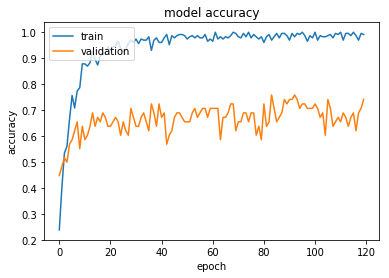

In [8]:
# Train Deep CNN

batch_size = 16
epochs = 120
opt = keras.optimizers.adam(lr=0.001)

CNN = CNN()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test = fix_dim(X_train, X_test)

CNN.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

t0 = time()

history = CNN.fit(X_train, y_train,
                   batch_size=batch_size,
                   validation_data=(X_test, y_test),
                   epochs=epochs,
                   shuffle = True)

t1 = time()
total = t1 - t0
print("Time to train = %f" % total)

# Plot Results
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()